In [1]:
import pybeam.precoded as pbp


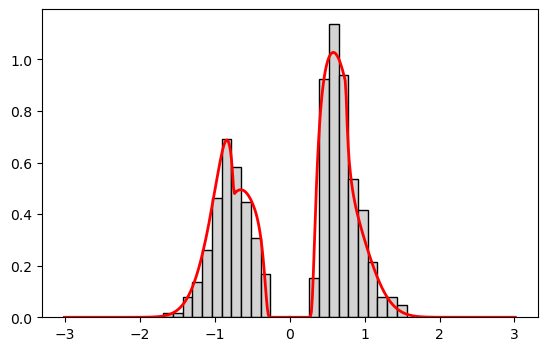

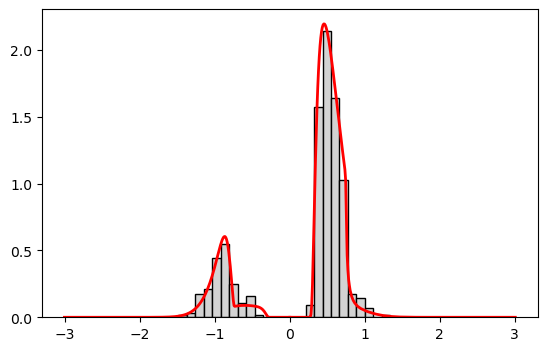

In [9]:
model = pbp.UGM_flip()

phi0 = {'tnd' : 0.25,
          'w' : 0.5,
         'mu' : 0.5,
          'l' : 5.0,
          'k' : 1.0,
     't_flip' : 0.5,
          'b' : 0.75}

rt0 = pbp.simulate(N_sims = 500, model = model, phi = phi0, seed = 123)
fig0 = pbp.plot_rt(model = model, phi = phi0, rt_max = 3.0, rt = rt0);

phi1 = {'tnd' : 0.25,
          'w' : 0.5,
         'mu' : 2.0,
          'l' : 5.0,
          'k' : 1.0,
     't_flip' : 0.5,
          'b' : 0.75}

rt1 = pbp.simulate(N_sims = 500, model = model, phi = phi1, seed = 456)
fig1 = pbp.plot_rt(model = model, phi = phi1, rt_max = 3.0, rt = rt1);


In [10]:
p = {'p_tnd' : 'Uniform("tnd", lower = 0.0, upper = 1.0)',
       'p_w' : 'Uniform("w", lower = 0.25, upper = 0.75)',
     'p_mu0' : 'Uniform("mu0", lower = -5.0, upper = 5.0)', 
     'p_mu1' : 'Uniform("mu1", lower = -5.0, upper = 5.0)', 
       'p_l' : 'Uniform("l", lower = 0.0, upper = 10.0)', 
       'p_k' : 'Uniform("k", lower = 0.0, upper = 10.0)', 
  'p_t_flip' : 'Uniform("t_flip", lower = 0.0, upper = 1.0)', 
       'p_b' : 'Uniform("b", lower = 0.1, upper = 2.5)'}

c0 = {'rt' : rt0, 
     'tnd' : 'p_tnd',
       'w' : 'p_w',
      'mu' : 'p_mu0',
       'l' : 'p_l',
       'k' : 'p_k',
  't_flip' : 'p_t_flip',
       'b' : 'p_b'}

c1 = {'rt' : rt1, 
     'tnd' : 'p_tnd',
       'w' : 'p_w',
      'mu' : 'p_mu1',
       'l' : 'p_l',
       'k' : 'p_k',
  't_flip' : 'p_t_flip',
       'b' : 'p_b'}

c = {0 : c0, 1 : c1}

idata = pbp.inference(model = model,   
                     priors = p,       
                 conditions = c,       
                    samples = 25000,   
                     chains = 3,       
                      cores = 3,          
                  file_name = 'UGM_flip')


Multiprocess sampling (3 chains in 3 jobs)
DEMetropolisZ: [b, t_flip, k, l, mu1, mu0, w, tnd]


/Users/matthewmurrow/opt/miniconda3/envs/pymc_env/lib/python3.10/site-packages/pymc/step_methods/metropolis.py:1024: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 3 chains for 0 tune and 25_000 draw iterations (0 + 75_000 draws total) took 48 seconds.


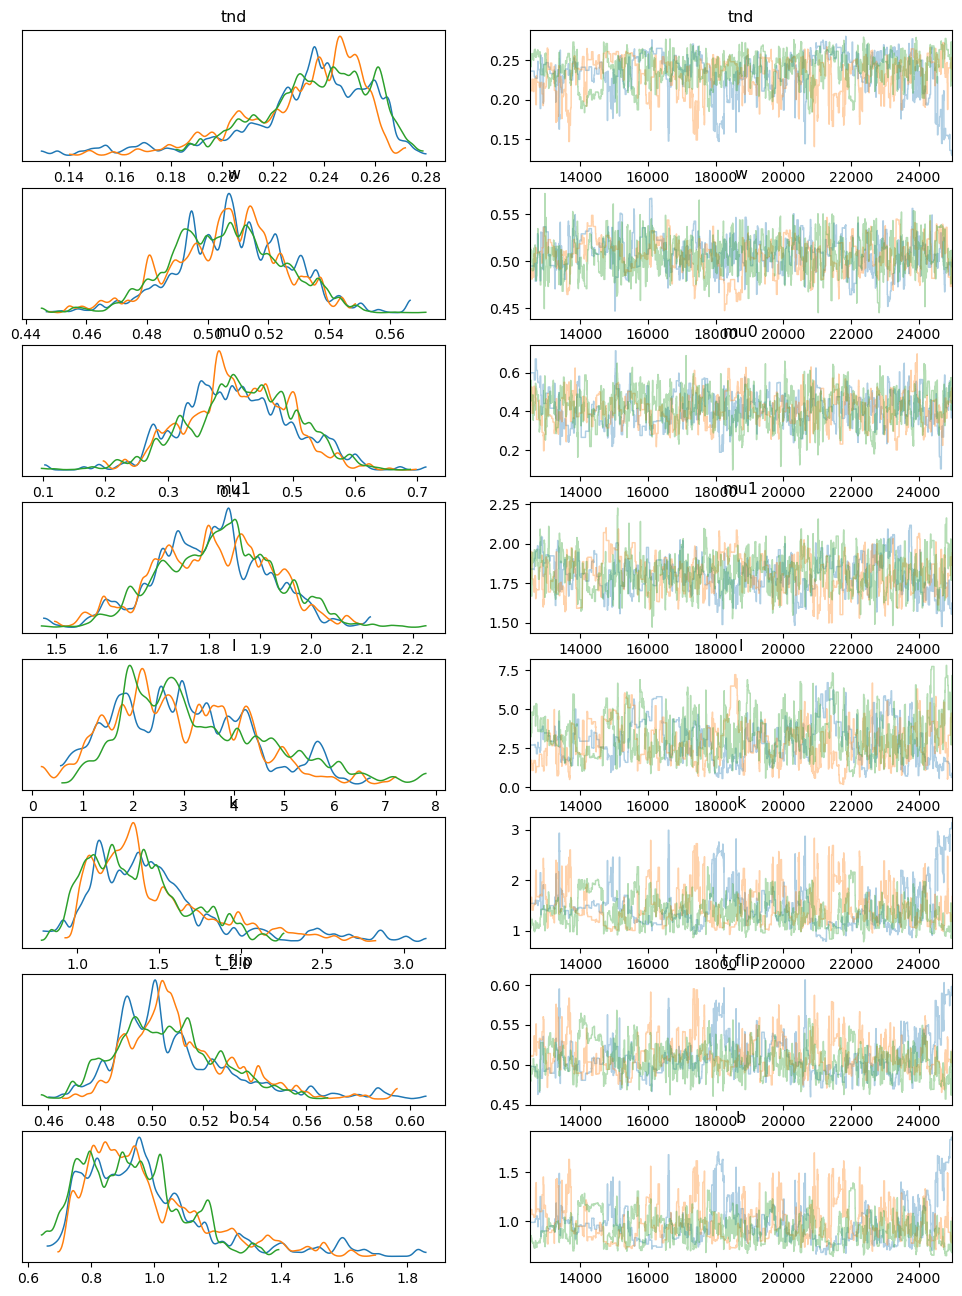

In [11]:
pbp.plot_idata(file_name = 'UGM_flip', burnin = 12500);


In [12]:
pbp.summary(file_name = 'UGM_flip', burnin = 12500)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
tnd,0.234,0.024,0.187,0.268,0.002,0.002,124.0,194.0,1.02
w,0.507,0.018,0.473,0.541,0.001,0.001,294.0,380.0,1.01
mu0,0.415,0.085,0.266,0.570,0.005,0.003,353.0,479.0,1.01
mu1,1.811,0.111,1.593,2.006,0.008,0.006,194.0,473.0,1.01
l,3.081,1.373,0.810,5.710,0.122,0.086,128.0,305.0,1.02
k,1.437,0.375,0.887,2.162,0.035,0.025,119.0,192.0,1.02
t_flip,0.509,0.022,0.469,0.549,0.002,0.002,128.0,213.0,1.02
b,0.962,0.191,0.673,1.327,0.018,0.013,112.0,176.0,1.02
